### CarScout24: Data-Analysis | Statistics | Linear Regression | Visualizations
###
### TASK:
### Führe eine lineare Regression des Datensatzes autoscout24 durch, um den Preis von Fahrzeugen vorherzusagen.
###
### Projektstruktur:
### 1) Datenaufbereitung
### Daten laden und auf fehlende Werte prüfen.
### Relevante Spalten auswählen und fehlende Werte entfernen.
###
### 2) Explorative Datenanalyse
### Verteilung der numerischen Variable "price" untersuchen.
### Beziehungen zwischen Variablen visualisieren.
###
### 3) Merkmalauswahl & Zielkodierung
### Numerische und kategorische Spalten definieren.
### Target Encoding mit Training-Test-Split durchführen.
###
### 4) Modellerstellung
### Lineare Regression trainieren und auswerten.
###
### 5) Hypothesentest
### Hypothese: Autos mit hohem Kilometerstand sind günstiger.
### t-Test für Preisunterschiede zwischen hohen und niedrigen Kilometerständen.
###
### 6) Ergebnisse präsentieren
### Regressionsergebnisse visualisieren.
###

In [1]:
# Imports:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
length = 55

In [3]:
# 1) Datenaufbereitung:
# Daten laden und auf fehlende Werte prüfen.
# Relevante Spalten auswählen und fehlende Werte entfernen.

data = pd.read_csv("autoscout24.csv")
data = data.dropna(subset=["make", "model", "fuel", "gear", "offerType", "price", "hp"])

In [4]:
data

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


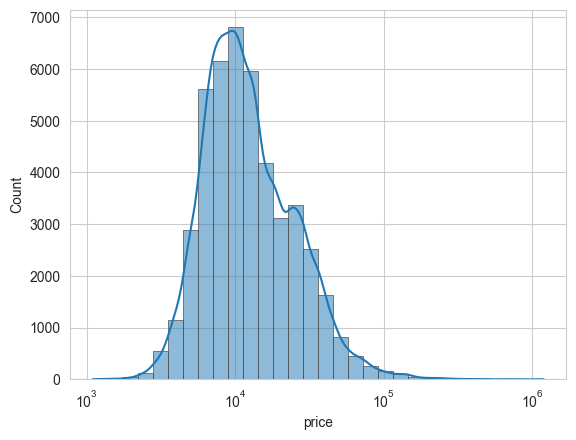

In [5]:
# 2) Explorative Datenanalyse
# Verteilung der numerischen Variable untersuchen.
# Beziehungen zwischen Variable und Anzahl visualisieren.

sns.histplot(
	data,
	x="price",
	bins=30,
	kde=True,
	edgecolor=".3",
	linewidth=.5,
	log_scale=True,
);

In [6]:
# 3) Merkmalauswahl & Zielkodierung
# Numerische und kategorische Spalten definieren.
# Target Encoding mit Training-Test-Split durchführen.

# Definition kategorischer und numerischer Spalten
cat_cols = ["make", "model", "fuel", "gear", "offerType"]
features = ["mileage", "year", "hp"]
target = "price"

# Train-Test-Split, einteilen von Trainings- und Test-Daten
# 80% der Daten für das Training, 20% für den Test
X_train, X_test, y_train, y_test = train_test_split(
	data[features + cat_cols],
	data[target],
	test_size=0.2,
	random_state=42
)

# Erstellt Kopie von X_train und fügt 'price'-Spalte hinzu, da vorher nicht vorhanden in Trainings-Daten
train_data = X_train.copy()
train_data[target] = y_train  # train_data enthält nun Zielvariable 'price'

# Target Encoding für jede kategorische Spalte
for col in cat_cols:
	# Berechnet durchschnittliche Preise pro Kategorie NUR mit Trainings-Daten
	mean_target_encoding = train_data.groupby(col)[target].mean()

	# Ersetzt Kategorien in den Trainings-Daten durch die berechneten Mittelwerte
	X_train[col + '_encoding'] = X_train[col].map(mean_target_encoding)

	# Ersetzt Kategorien in den Test-Daten durch dieselben Mittelwerte aus den Trainings-Daten
	# Falls eine Kategorie im Testset nicht existiert, wird der durchschnittliche Preis des Gesamt-Datensatzes genutzt
	X_test[col + '_encoding'] = X_test[col].map(mean_target_encoding).fillna(data[target].mean())

# Entfernt ursprüngliche kategorische Spalten, weil nun numerisch kodiert
X_train = X_train.drop(columns=cat_cols)
X_test = X_test.drop(columns=cat_cols)

In [75]:
print("Trainigs-Daten (X_train): \n", X_train)

Trainigs-Daten (X_train): 
        mileage  year     hp  make_encoding  model_encoding  fuel_encoding  \
31407   104660  2015  110.0   11324.244671     9785.731092   18099.019356   
18229   111458  2011  170.0   15985.242144    13517.527363   18099.019356   
269      84000  2013  110.0   13721.590423     9614.714286   18099.019356   
3161    114081  2012   69.0    9837.570893    11008.651042   15086.974619   
4827     10988  2019   92.0   11324.244671    10848.234375   22071.127413   
...        ...   ...    ...            ...             ...            ...   
11353    21000  2020  179.0   13814.398295    16576.663900   18099.019356   
45052     2650  2020  125.0   13814.398295    23290.469388   30015.872626   
38419    52900  2014  105.0   13814.398295     9122.770000   15086.974619   
865      54140  2014   90.0   11324.244671    15103.409722   15086.974619   
15894   106642  2013   87.0   10377.764721     9532.530351   15086.974619   

       gear_encoding  offerType_encoding  
3140

In [78]:
print("Test-Daten (X_test): \n", X_test)

Test-Daten (X_test): 
        mileage  year     hp  make_encoding  model_encoding  fuel_encoding  \
35779    67453  2012  122.0   29092.579570    14585.738318   15086.974619   
14011    53080  2015   80.0   11681.120954     7056.016667   15086.974619   
21934    58561  2019  120.0   13814.398295    12350.393443   18099.019356   
10984   170000  2012  204.0   29092.579570    18044.956522   15086.974619   
28696    13756  2019  131.0   10377.764721    22362.480769   15086.974619   
...        ...   ...    ...            ...             ...            ...   
17329        5  2020   90.0   15985.242144    13517.527363   15086.974619   
7039    117226  2014  110.0   15985.242144    13517.527363   18099.019356   
8845        10  2021   72.0   11940.157017     8487.423469   15086.974619   
46143     5000  2021  140.0   11324.244671     9785.731092   15086.974619   
19902   165000  2013  177.0   15985.242144    12984.666667   18099.019356   

       gear_encoding  offerType_encoding  
35779   2

In [ ]:
print("Test-Daten (X_test): \n", X_test)

In [76]:
print("Trainigs-Daten (y_train): \n", y_train)

Trainigs-Daten (y_train): 
 31407     8890
18229    11450
269       8888
3161      6600
4827     11975
         ...  
11353    28890
45052    21950
38419     9989
865       9950
15894     6890
Name: price, Length: 36856, dtype: int64


In [77]:
print("Test-Daten (y_test): \n", y_test)

Test-Daten (X_test): 
        mileage  year     hp  make_encoding  model_encoding  fuel_encoding  \
35779    67453  2012  122.0   29092.579570    14585.738318   15086.974619   
14011    53080  2015   80.0   11681.120954     7056.016667   15086.974619   
21934    58561  2019  120.0   13814.398295    12350.393443   18099.019356   
10984   170000  2012  204.0   29092.579570    18044.956522   15086.974619   
28696    13756  2019  131.0   10377.764721    22362.480769   15086.974619   
...        ...   ...    ...            ...             ...            ...   
17329        5  2020   90.0   15985.242144    13517.527363   15086.974619   
7039    117226  2014  110.0   15985.242144    13517.527363   18099.019356   
8845        10  2021   72.0   11940.157017     8487.423469   15086.974619   
46143     5000  2021  140.0   11324.244671     9785.731092   15086.974619   
19902   165000  2013  177.0   15985.242144    12984.666667   18099.019356   

       gear_encoding  offerType_encoding  
35779   2

In [7]:
# 4) Modellerstellung
# Lineare Regression trainieren und auswerten.

model = LinearRegression()
model = model.fit(X_train, y_train)

predictions = model.predict(X_test)

y_test_mse = mean_squared_error(y_test, predictions)
rmse = round(np.sqrt(y_test_mse), 2)
y_test_r_sqr = r2_score(y_test, predictions)

print("Trainigs-Modell (X_ & y_): ".ljust(length), model)
print("y_test: Std-Fehler (Mean-Squared-Error): ".ljust(length), y_test_mse)
print("y_test: R-Quadrat (R²): ".ljust(length), y_test_r_sqr)
print("X_test: die ersten 3 Vorhersagen (Predictions): ".ljust(length), predictions[: 3])
print("Standardabweichung Vorhersagen zum echten Preis: ".ljust(length), rmse, "€", "\n")
print("FAZIT:\n"
	  "✅ Das Modell erklärt 83,7 % der Preisvarianz (R² = 0,837) → Guter Wert!\n"
	  "✅ Durchschnittlicher Fehler (RMSE) liegt bei ca. 7.437 € → Akzeptabel, aber optimierbar.")

Trainigs-Modell (X_ & y_):                              LinearRegression()
y_test: Std-Fehler (Mean-Squared-Error):                55351830.22381595
y_test: R-Quadrat (R²):                                 0.8372318192791466
X_test: die ersten 3 Vorhersagen (Predictions):         [12468.65092776  5914.0201755  14762.72290934]
Standardabweichung Vorhersagen zum echten Preis:        7439.88 € 

FAZIT:
✅ Das Modell erklärt 83,7 % der Preisvarianz (R² = 0,837) → Guter Wert!
✅ Durchschnittlicher Fehler (RMSE) liegt bei ca. 7.437 € → Akzeptabel, aber optimierbar.


In [8]:
# 5) Hypothesentest
# Hypothese: Autos mit hohem Kilometerstand sind günstiger.
# t-Test für Preisunterschiede zwischen hohen und niedrigen Kilometerständen.

high_mileage = data[data["mileage"] > data["mileage"].median()]["price"]
low_mileage = data[data["mileage"] <= data["mileage"].median()]["price"]

t_stat, p_value = ttest_ind(high_mileage, low_mileage)

print("die ersten 3 Vorhersagen: ".ljust(length), predictions[: 3])
print("t-Statistik: ".ljust(length), t_stat)
print("p-Wert: ".ljust(length), p_value, "\n")
print("FAZIT:\n"
	  "✅ Die Hypothese „Autos mit hohem Kilometerstand sind günstiger“ wird stark bestätigt.\n"
	  "✅ Ein p-Wert von 0,0 (oder extrem klein) bedeutet, dass die Wahrscheinlichkeit, dass dieser Unterschied zufällig auftritt, praktisch null ist.\n"
	  "✅ Der Preisunterschied ist statistisch hoch signifikant.")

die ersten 3 Vorhersagen:                               [12468.65092776  5914.0201755  14762.72290934]
t-Statistik:                                            -67.01379462758575
p-Wert:                                                 0.0 

FAZIT:
✅ Die Hypothese „Autos mit hohem Kilometerstand sind günstiger“ wird stark bestätigt.
✅ Ein p-Wert von 0,0 (oder extrem klein) bedeutet, dass die Wahrscheinlichkeit, dass dieser Unterschied zufällig auftritt, praktisch null ist.
✅ Der Preisunterschied ist statistisch hoch signifikant.


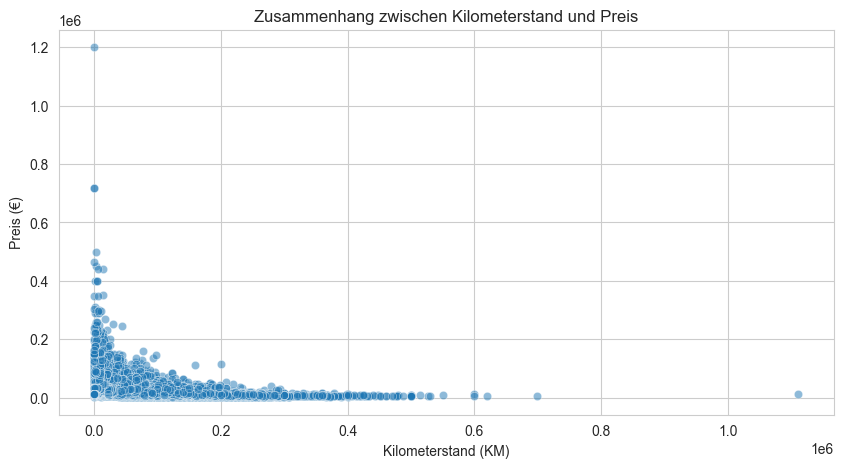

FAZIT:
✅ Der t-Test zeigt starke Beweise dafür, dass Autos mit hohem Kilometerstand günstiger sind.
✅ mileage ist ein sehr wichtiger Prädiktor für den Preis und sollte besonders genau modelliert werden.


In [9]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data["mileage"], y=data["price"], alpha=0.5)
plt.xlabel("Kilometerstand (KM)")
plt.ylabel("Preis (€)")
plt.title("Zusammenhang zwischen Kilometerstand und Preis")
plt.show()
print("FAZIT:\n"
	  "✅ Der t-Test zeigt starke Beweise dafür, dass Autos mit hohem Kilometerstand günstiger sind.\n"
	  "✅ mileage ist ein sehr wichtiger Prädiktor für den Preis und sollte besonders genau modelliert werden.")

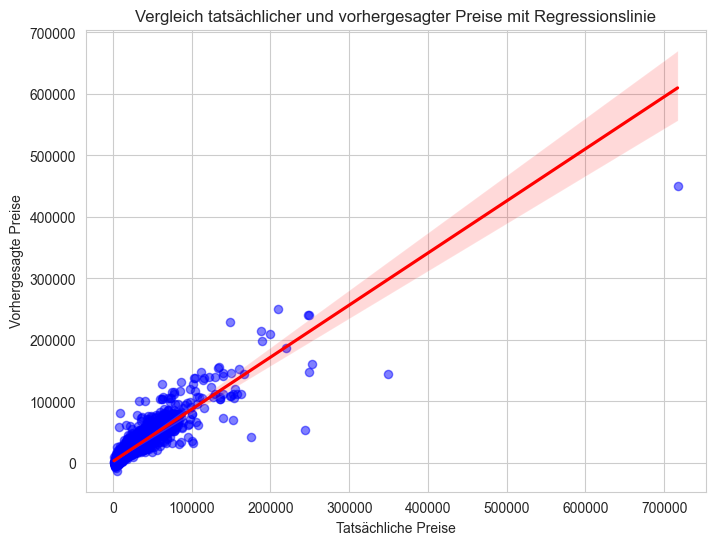

FAZIT:
✅ Das Modell funktioniert gut für Fahrzeuge mit niedrigem bis mittlerem Preisbereich.
✅ Bei sehr teuren Autos scheint es starke Fehler zu geben.

Ursachen & Verbesserungen:

1️⃣ Ausreißerbehandlung:
Hochpreisige Autos könnten Sondermodelle oder Luxusfahrzeuge sein.
Überprüfen Sie, ob man diese besonderen Fahrzeuge modelliert.

2️⃣ Funktionsentwicklung:
Gibt es Merkmale, die den hohen Preis besser erklären? (z. B. Ausstattung, Marke, Seltenheit ?)
Vielleicht fehlen wichtige Informationen über Premium-Autos.

3️⃣ Nicht-lineare Modelle testen:
Die lineare Regression könnte für sehr hohe Preise ungeeignet sein.
Ein Random Forest oder Gradient Boosting Modell könnte besser funktionieren.


In [10]:
# 6) Ergebnisse präsentieren
# Regressionsergebnisse visualisieren.
# Residuenplot zur Modellbewertung erstellen.

# Scatterplot mit Regressionslinie
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=predictions, scatter_kws={"s": 35, "alpha": 0.5, "color": "blue", "marker": "o"},
			line_kws={"color": "red"})

# Achsenbeschriftung & Titel
plt.xlabel("Tatsächliche Preise")
plt.ylabel("Vorhergesagte Preise")
plt.title("Vergleich tatsächlicher und vorhergesagter Preise mit Regressionslinie")
plt.show()
print("FAZIT:\n"
	  "✅ Das Modell funktioniert gut für Fahrzeuge mit niedrigem bis mittlerem Preisbereich.\n"
	  "✅ Bei sehr teuren Autos scheint es starke Fehler zu geben.\n\n"
	  "Ursachen & Verbesserungen:\n\n"
	  "1️⃣ Ausreißerbehandlung:\n"
	  "Hochpreisige Autos könnten Sondermodelle oder Luxusfahrzeuge sein.\n"
	  "Überprüfen Sie, ob man diese besonderen Fahrzeuge modelliert.\n\n"
	  "2️⃣ Funktionsentwicklung:\n"
	  "Gibt es Merkmale, die den hohen Preis besser erklären? (z. B. Ausstattung, Marke, Seltenheit ?)\n"
	  "Vielleicht fehlen wichtige Informationen über Premium-Autos.\n\n"
	  "3️⃣ Nicht-lineare Modelle testen:\n"
	  "Die lineare Regression könnte für sehr hohe Preise ungeeignet sein.\n"
	  "Ein Random Forest oder Gradient Boosting Modell könnte besser funktionieren."
	  )